In [3]:
import numpy as np
import pandas as pd
import kagglehub
import os

from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.svm import SVC
from typing_extensions import override

PATH_TO_DATASET = os.path.join(kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube"),
                               "Spotify_Youtube.csv")

# Reading the dataset
While dropping unneeded columns, similarly to the first part. Additional columns that are dropped: 'Artist'

In [4]:
df = pd.read_csv(PATH_TO_DATASET)
NUMERIC_COLUMNS = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
                   'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
CATEGORICAL_COLUMNS = ['Album_type', 'Licensed', 'official_video']
df.drop(
    columns=['Description', 'Url_youtube', 'Url_spotify', 'Uri', 'Title', 'Channel', 'Album', 'Track', 'Unnamed: 0', 'Artist'],
    axis=1, inplace=True)
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


### Normalizing Loudness metric


In [5]:
df['Loudness']= MinMaxScaler(feature_range=(0, 1)).fit_transform(df[['Loudness']])
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,0.817861,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,0.098212,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,0.000000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,0.792712,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,0.841937,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,0.875962,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,1.000000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


### Scaling the overly spread metrics: Likes, Views, Comments and Streams
In contrast to the first part, the values will be scaled using a logarithmic scale instead of the outliers being capped, with the bottom 3% being dropped completely (songs with a dismal amount of attention).

In [6]:
display("Size before dropping outliers: ", df.shape)
thresholds = {column_name: df[column_name].quantile(0.03) for column_name in ['Views', 'Likes', 'Comments', 'Stream']}
mask = df[list(thresholds.keys())].gt(pd.Series(thresholds)).all(axis=1)
df = df[mask]
display("Size after dropping outliers: ", df.shape)

'Size before dropping outliers: '

(20718, 18)

'Size after dropping outliers: '

(18187, 18)

In [7]:
df.loc[:, 'Views'] = np.log10(df['Views'])
df.loc[:, 'Likes'] = np.log10(df['Likes'])
df.loc[:, 'Comments'] = np.log10(df['Comments'])
df.loc[:, 'Stream'] = np.log10(df['Stream'])
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,1.818600e+04,18187.000000,18187.000000,18187.000000,18187.000000
mean,0.624021,0.640492,5.308644,0.823122,0.092491,0.282504,0.049100,0.190521,0.532134,120.834939,2.260323e+05,7.139007,5.100764,3.531662,7.743577
std,0.162479,0.207076,3.575914,0.089913,0.094687,0.279682,0.180283,0.164621,0.242895,29.389313,1.240275e+05,1.030558,0.931282,0.984654,0.623354
min,0.000000,0.001250,0.000000,0.091560,0.000000,0.000002,0.000000,0.014500,0.000000,0.000000,3.500000e+04,4.260167,2.413300,0.477121,6.189394
25%,0.522000,0.517000,2.000000,0.798075,0.035500,0.043700,0.000000,0.094000,0.343000,97.028000,1.819910e+05,6.465060,4.519001,2.924796,7.319701
50%,0.640000,0.668000,5.000000,0.843665,0.050600,0.186000,0.000002,0.125000,0.538000,119.973000,2.144520e+05,7.255736,5.183307,3.609594,7.743738
75%,0.743000,0.797000,8.000000,0.876768,0.103000,0.458000,0.000342,0.232000,0.728000,139.969000,2.527330e+05,7.893353,5.760114,4.209917,8.172799
max,0.975000,1.000000,11.000000,1.000000,0.944000,0.996000,1.000000,1.000000,0.993000,243.372000,4.581483e+06,9.907393,7.705767,7.206371,9.529754


### Reducing the skew of the data

#### Goal: Skew < 2.0
Columns 'Intrumentalness', 'Loudness', 'Liveness' and 'Speechiness' have a highly skewed distribution that will affect the machine learning models.
Column describing the duration of the song has a skewness of over 24 – with approximately the top 1% amounting to all the skew.
Histograms displaying the skew below.

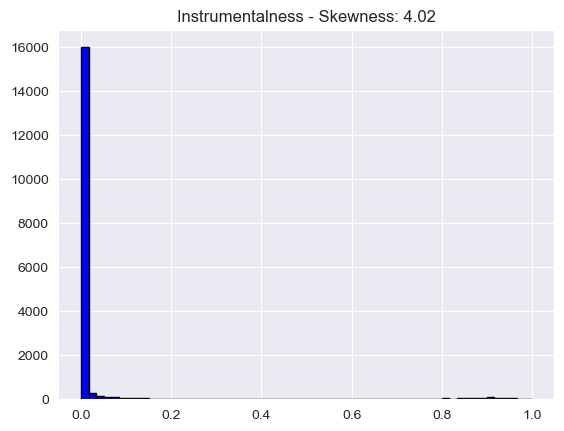

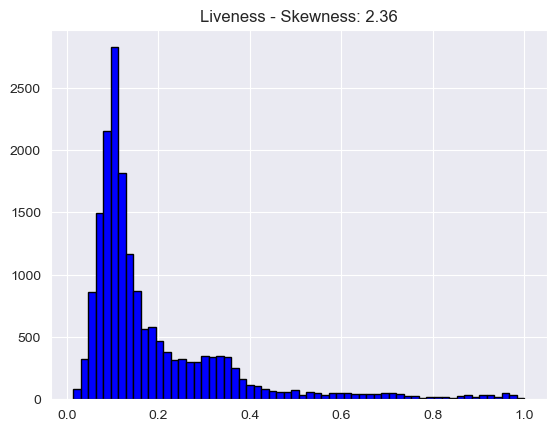

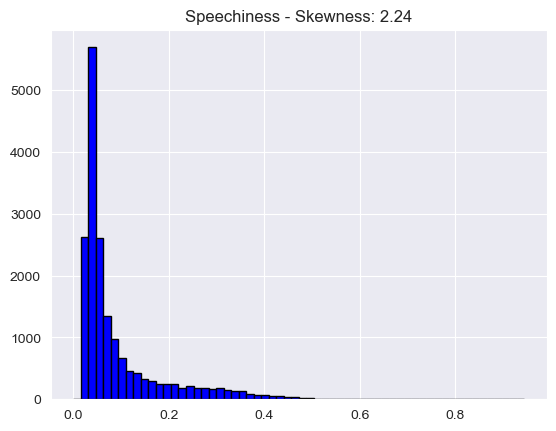

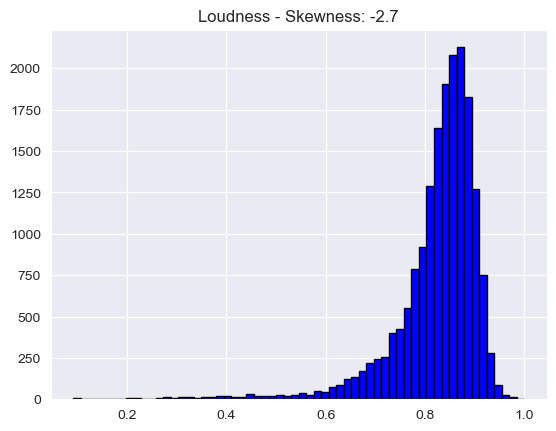

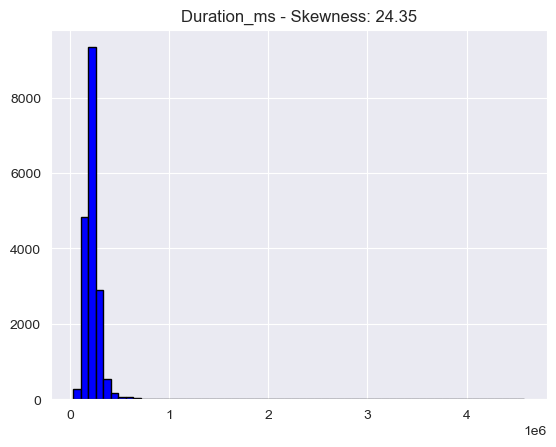

In [8]:
for column in ['Instrumentalness', 'Liveness', 'Speechiness', 'Loudness', 'Duration_ms']:
    plt.hist(df[column], bins=60, color='blue', edgecolor='black')
    plt.title(f'{column} - Skewness: {str(round(df[column].skew(), 2))}')
    plt.plot()
    plt.show()
    plt.close()

### Redefining the 'Instrumentalness' metric
The value of the metric is either extremely close to zero or, with a tiny number of songs, close to one. As such, it will be replaced with a binary variable.
- Value < 0.1 → False
- Value >= 0.1 → True


New metric name: `IsInstrumental`

In [9]:
df['Instrumentalness']=  df['Instrumentalness'].apply(lambda x: True if x is not None and x >= 0.1 else False)
display(df['Instrumentalness'].isnull().sum())
print(df['Instrumentalness'].value_counts())
print(df['Instrumentalness'])
NUMERIC_COLUMNS.remove('Instrumentalness')
CATEGORICAL_COLUMNS.append('Instrumentalness')

np.int64(0)

Instrumentalness
False    16726
True      1461
Name: count, dtype: int64
0        False
1        False
2        False
3         True
4        False
         ...  
20694    False
20695    False
20696    False
20697    False
20698    False
Name: Instrumentalness, Length: 18187, dtype: bool


### Reducing the right (positive) skews for 'Liveness', 'Speechiness'
Using Square Root Transformation since the data is not extremely skewed.

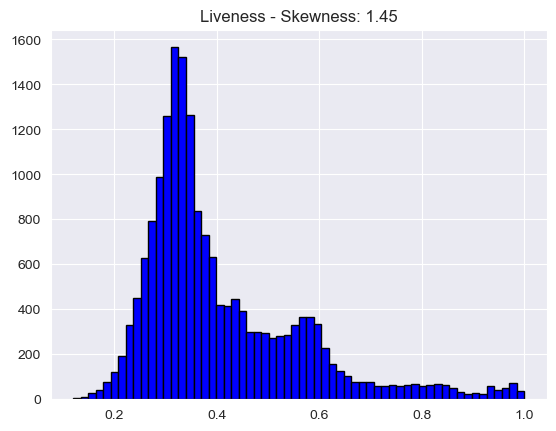

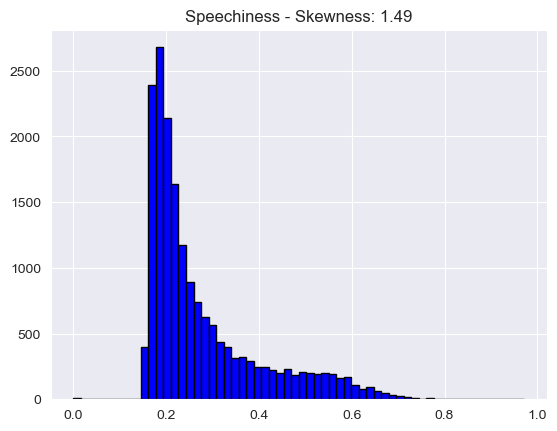

In [10]:
for column in ['Liveness', 'Speechiness']:
    df[column] = np.sqrt(df[column])
    plt.hist(df[column], bins=60, color='blue', edgecolor='black')
    plt.title(f'{column} - Skewness: {str(round(df[column].skew(), 2))}')
    plt.plot()
    plt.show()
    plt.close()

##### Capping the top outliers for duration
Value `0.987` was chosen to provide the best compromise between reducing the skew and retaining the data distribution.

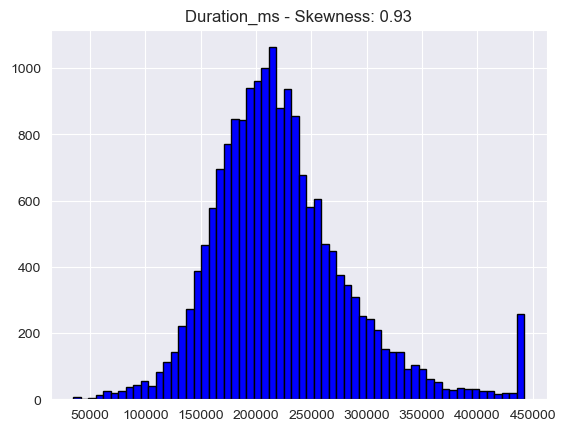

In [11]:
threshold = df['Duration_ms'].quantile(0.987)
df['Duration_ms'] = df['Duration_ms'].clip(upper=threshold)
plt.hist(df['Duration_ms'], bins=60, color='blue', edgecolor='black')
plt.title(f'Duration_ms - Skewness: {str(round(df['Duration_ms'].skew(), 2))}')
plt.plot()
plt.show()
plt.close()

### Reducing the left (negative) skews for 'Loudness'
Using lower Winsorization to limit the close to zero values. `0.013` chosen to reduce the skew under 2.0 without capping too many values.

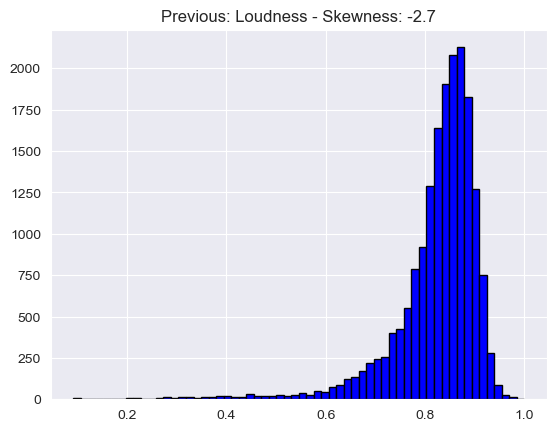

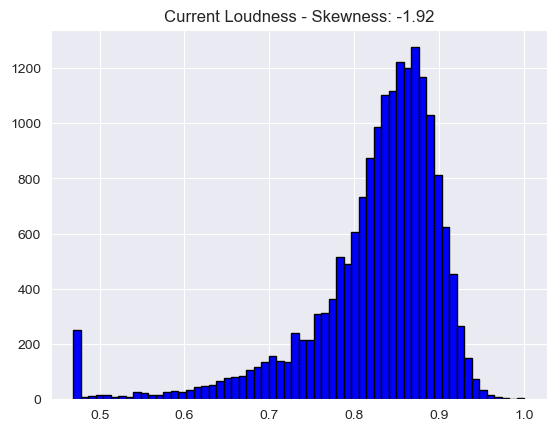

In [12]:
plt.hist(df['Loudness'], bins=60, color='blue', edgecolor='black')
plt.title(f'Previous: Loudness - Skewness: {str(round(df['Loudness'].skew(), 2))}')
plt.plot()
plt.show()
plt.close()
df['Loudness'] = df['Loudness'].clip(lower=df['Loudness'].quantile(0.013))
plt.hist(df['Loudness'], bins=60, color='blue', edgecolor='black')
plt.title(f'Current Loudness - Skewness: {str(round(df['Loudness'].skew(), 2))}')
plt.plot()
plt.show()
plt.close()

# Creating the pipelines

### Separate features and the target

In [13]:
target = 'official_video'
X = df.drop(columns=[target], axis=1)
y = df[target]
NEW_CATEGORICAL_COLUMNS = CATEGORICAL_COLUMNS.copy()
NEW_CATEGORICAL_COLUMNS.remove(target)

### Create preprocessing pipelines


In [14]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), #check kNN imputation
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_pipeline, NUMERIC_COLUMNS),
        ('categorical', categorical_pipeline, NEW_CATEGORICAL_COLUMNS),
    ]
)

#### Define the model pipeline

In [16]:
model_pipelines: dict[str, Pipeline] = {}

def add_model_pipeline(classifier, name: str):
    model_pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

In [17]:
add_model_pipeline(LogisticRegression(max_iter=1000), 'logReg')
add_model_pipeline(RandomForestClassifier(random_state=42), 'rfc')
add_model_pipeline(SVC(), 'svc')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

#### Train the model

In [19]:
for pipeline in model_pipelines.values():
    pipeline.fit(X_train, y_train)

In [20]:
for pipeline_name, pipeline in model_pipelines.items():
    print(f"Model: {pipeline_name}")
    y_pred = pipeline.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

Model: logReg
Accuracy: 0.9304562946673997
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       788
           1       0.96      0.95      0.96      2850

    accuracy                           0.93      3638
   macro avg       0.89      0.91      0.90      3638
weighted avg       0.93      0.93      0.93      3638

Model: rfc
Accuracy: 0.9417262231995602
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       788
           1       0.97      0.95      0.96      2850

    accuracy                           0.94      3638
   macro avg       0.91      0.93      0.92      3638
weighted avg       0.94      0.94      0.94      3638

Model: svc
Accuracy: 0.937328202308961
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       788
           1       0.97      0.95      0.96

##  Regression implementation

Goal: try to predict the number of song's streams on Spotify based on YouTube metrics and song licensing

#### Defining the custom models

In [21]:
from abc import ABC

class CustomModel(ABC):
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
       pass

    def predict(self, X):
        if self.coef_ is None:
            raise ValueError("Model is not fitted yet.")
        if X.ndim == 1:
            X = X.reshape(1, -1)
        return X.dot(self.coef_) + self.intercept_

    def score(self, X, y):
        y_pred = self.predict(X)
        u = ((y - y_pred) ** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - (u / v) if v != 0 else 0.0

class CustomLinearRegression(CustomModel):

    def fit(self, X, y):
        X_design = np.c_[np.ones(X.shape[0]), X]
        try:
            weights = np.linalg.inv(X_design.T.dot(X_design)).dot(X_design.T).dot(y)
        except np.linalg.LinAlgError:
            weights = np.linalg.pinv(X_design.T.dot(X_design)).dot(X_design.T).dot(y)
        self.intercept_ = weights[0]
        self.coef_ = weights[1:]
        return self

class CustomGradientDescentRegression(CustomModel):
    def __init__(self, learning_rate=0.15, n_iterations=1000, tol=1e-3, random_state=42):
        super().__init__()
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tol = tol
        self.random_state = random_state
        self.cost_history_ = []

    def _get_msqe_cost(self, X, y, theta):
        return (1 / (2 * (len(y)))) * np.sum(np.square(X.dot(theta) - y))

    def fit(self, X, y):
        m, n = X.shape
        X_with_intercept = np.c_[np.ones(m), X]
        y = y.values
        if self.random_state is not None:
            np.random.seed(self.random_state)
        theta = np.random.randn(n + 1)
        prev_cost = float('inf')
        self.cost_history_ = []

        for i in range(self.n_iterations):
            predictions = X_with_intercept.dot(theta)
            gradient = (1 / m) * X_with_intercept.T.dot(predictions - y)
            theta = theta - self.learning_rate * gradient
            current_cost = self._get_msqe_cost(X_with_intercept, y, theta)
            self.cost_history_.append(current_cost)
            if abs(prev_cost - current_cost) < self.tol:
                break
            prev_cost = current_cost

        self.intercept_ = theta[0]
        self.coef_ = theta[1:]
        return self

class CustomGradientDescentRegWithBatches(CustomGradientDescentRegression):
    @override
    def fit(self, X, y):
        batch_size = 64
        y = y.values
        m, n = X.shape
        X_with_intercept = np.c_[np.ones(m), X]
        if self.random_state is not None:
            np.random.seed(self.random_state)
        theta = np.random.randn(n + 1)
        prev_cost = float('inf')
        self.cost_history_ = []
        indices = np.arange(m)

        for i in range(self.n_iterations):
            np.random.shuffle(indices)
            for start_idx in range(0, m, batch_size):
                batch_indices = indices[start_idx:min(start_idx + batch_size, m)]
                X_batch = X_with_intercept[batch_indices]
                y_batch = y[batch_indices]
                predictions = X_batch.dot(theta)
                gradient = (1 / len(y_batch)) * X_batch.T.dot(predictions - y_batch)
                theta = theta - self.learning_rate * gradient

            current_cost = self._get_msqe_cost(X_with_intercept, y, theta)
            self.cost_history_.append(current_cost)
            if abs(prev_cost - current_cost) < self.tol:
                break
            prev_cost = current_cost

        self.intercept_ = theta[0]
        self.coef_ = theta[1:]
        return self

#### Define the new pipeline
Target value: number of streams
Predictions based on: YouTube metrics and song licensing

In [22]:
target = 'Stream'
BASE_NUM_COLUMNS = ['Views', 'Likes', 'Comments']
BASE_CAT_COLUMNS = ['Licensed']
spotify_preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_pipeline,  BASE_NUM_COLUMNS),
       ('categorical', categorical_pipeline, BASE_CAT_COLUMNS),
    ]
)
X = df[BASE_NUM_COLUMNS + BASE_CAT_COLUMNS].copy()
y = df[target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train the models


In [23]:
spotify_model_pipelines: dict[str, Pipeline] = {}

def add_spotify_model_pipeline(regressor, name: str):
    spotify_model_pipelines[name] = Pipeline(steps=[
        ('preprocessor', spotify_preprocessor),
        ('regressor', regressor)
    ])

add_spotify_model_pipeline(CustomLinearRegression(), 'custom_linReg')
add_spotify_model_pipeline(LinearRegression(), 'linReg')
add_spotify_model_pipeline(CustomGradientDescentRegression(tol=1e-5, learning_rate=0.53, random_state=1), 'custom_gdReg')
add_spotify_model_pipeline(CustomGradientDescentRegWithBatches(tol=1e-5, learning_rate=0.53, random_state=1), 'custom_gdReg_batch')
add_spotify_model_pipeline(SGDRegressor(tol=1e-4, learning_rate='adaptive', random_state=1), 'sgdReg')

for pipeline in spotify_model_pipelines.values():
    pipeline.fit(X_train, y_train)

#### Compute the results

In [24]:
for pipeline_name, pipeline in spotify_model_pipelines.items():
    print(f"Model: {pipeline_name}")
    print(f"MSE: {mean_squared_error(y_test, pipeline.predict(X_test))}")
    print(f"Score: {pipeline.score(X_test, y_test)}")
    print("------------------------------------------")

Model: custom_linReg
MSE: 0.2513234578836733
Score: 0.3653244303403007
------------------------------------------
Model: linReg
MSE: 0.2513234578836733
Score: 0.3653244303403006
------------------------------------------
Model: custom_gdReg
MSE: 0.2512431913706538
Score: 0.3655271300616246
------------------------------------------
Model: custom_gdReg_batch
MSE: 0.2534464655339643
Score: 0.3599631278133235
------------------------------------------
Model: sgdReg
MSE: 0.2513233423921149
Score: 0.3653247219950121
------------------------------------------


## Regression model in PyTorch

In [59]:
from torch import tensor, nn, float32, optim, no_grad
from torch.utils.data import TensorDataset, DataLoader

X = df[BASE_NUM_COLUMNS + BASE_CAT_COLUMNS].copy()
y = df[target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = tensor(spotify_preprocessor.fit_transform(X_train), dtype=float32)
y_train_tensor = tensor(y_train.values, dtype=float32)

X_test_tensor = tensor(spotify_preprocessor.fit_transform(X_test), dtype=float32)
y_test_tensor = tensor(y_test.values, dtype=float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

In [60]:
n_features = X_train_tensor.shape[1]
torch_model = nn.Linear(n_features, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(torch_model.parameters(), lr=0.1)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [61]:
def train_epoch(X_tensor, y_tensor):
    optimizer.zero_grad()
    y_pred = torch_model(X_tensor).squeeze()
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()


num_epochs = 2500
for epoch in range(num_epochs):
    torch_model.train()
    for X_batch, y_batch in train_loader:
        train_epoch(X_batch, y_batch)
    if epoch+1 % 10 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}")

Epoch [10/2500], Loss: 0.3207004964351654
Epoch [10/2500], Loss: 0.2272873967885971
Epoch [10/2500], Loss: 0.19387581944465637
Epoch [10/2500], Loss: 0.17470070719718933
Epoch [10/2500], Loss: 0.26625415682792664
Epoch [10/2500], Loss: 0.34161436557769775
Epoch [10/2500], Loss: 0.21947240829467773
Epoch [10/2500], Loss: 0.2392026036977768
Epoch [10/2500], Loss: 0.2535838186740875
Epoch [10/2500], Loss: 0.16347691416740417
Epoch [10/2500], Loss: 0.31025394797325134
Epoch [10/2500], Loss: 0.273786336183548
Epoch [10/2500], Loss: 0.23705214262008667
Epoch [10/2500], Loss: 0.2615540325641632
Epoch [10/2500], Loss: 0.26026707887649536
Epoch [10/2500], Loss: 0.2208428680896759
Epoch [10/2500], Loss: 0.2974943518638611
Epoch [10/2500], Loss: 0.2768899202346802
Epoch [10/2500], Loss: 0.20225724577903748
Epoch [10/2500], Loss: 0.32705387473106384
Epoch [10/2500], Loss: 0.23791958391666412
Epoch [10/2500], Loss: 0.2772810757160187
Epoch [10/2500], Loss: 0.23508842289447784
Epoch [10/2500], Loss:

In [62]:
torch_model.eval()
with no_grad():
    test_predictions = torch_model(X_test_tensor).squeeze()
    test_loss = criterion(test_predictions, y_test_tensor)
    model_mse = test_loss.item()
    print(f"MSE: {model_mse}")
    y_mean = y_test_tensor.mean()
    baseline_mse = ((y_test_tensor - y_mean) ** 2).mean()
    r2_score = 1 - (model_mse / baseline_mse)
    print(f"Score: {r2_score}")


MSE: 0.2534960210323334
Score: 0.35983794927597046
